# HW2: Integrate and Fire Neuron 

**Group 2**: Zach Uhlig, Tommy Neumann, Diya Chutani, Rohan Mathur, Zachary Wang, Saima Mirza, and NAtalie Olufunmilayo

_An integatate and fire model is a model that is able to represent the integration of signals incoming in a neuron and the subsequent "spike." It does this through the use of a spike generator. One of the main limitations of such a model is it really can't model a spike properly as it does not have VG sodium or potassium channels. An IF model is able to show a neuron reaching threshold, but it goes back down to resting immediately_

Practicing markdown: 

## Here is a slightly smaller heading 

**Here is some bold with some _italics_ thrown in**

Let's add some blockquotes: 
>This is what I am saying right now,
>I am still typing right now

* Why not make a list while we are at it
    * Here is a subbullet, I hope 


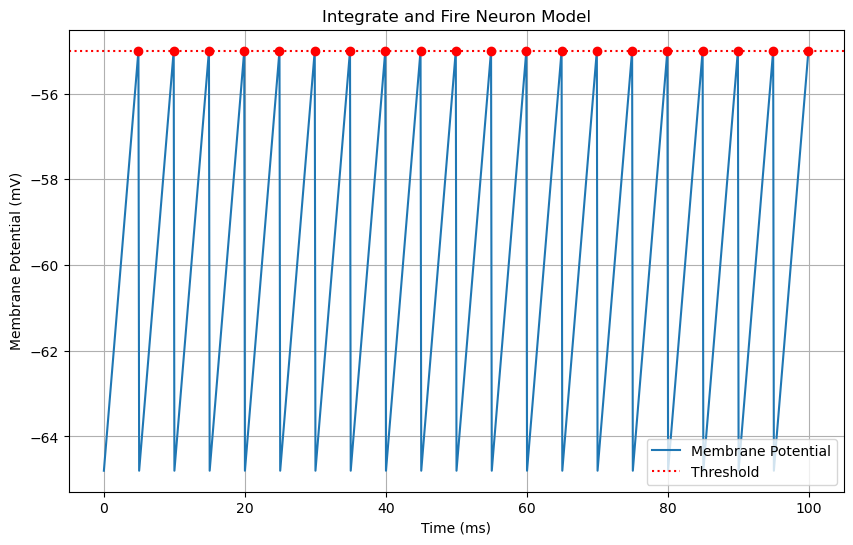

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class IntegrateFireNeuron:
    def __init__(self, resting_potential=-65, threshold=-55):
        self.resting_potential = resting_potential
        self.threshold = threshold
        self.membrane_potential = resting_potential

    def simulate(self, duration_ms, input_current):
        dt = 0.1
        time = np.arange(0, duration_ms, dt)
        membrane_potential = np.zeros_like(time)
        spikes = []

        for i in range(len(time)):
            # Limit potential at threshold
            if self.membrane_potential < self.threshold:
                self.membrane_potential += input_current * dt
            
            # Cap at threshold
            self.membrane_potential = min(self.membrane_potential, self.threshold)
            membrane_potential[i] = self.membrane_potential

            # Reset when reaching threshold
            if membrane_potential[i] == self.threshold:
                spikes.append(time[i])
                self.membrane_potential = self.resting_potential

        return time, membrane_potential, spikes

def plot_neuron_response():
    neuron = IntegrateFireNeuron()
    duration = 100  # ms
    input_current = 2  # reduced current to limit spikes
    time, potential, spikes = neuron.simulate(duration, input_current)

    plt.figure(figsize=(10, 6))
    plt.plot(time, potential, label='Membrane Potential')
    plt.axhline(y=-55, color='r', linestyle=':', label='Threshold')
    plt.title('Integrate and Fire Neuron Model')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.grid(True)
    
    for spike in spikes:
        plt.plot(spike, -55, 'ro')

    plt.show()

# Run the simulation
plot_neuron_response()

There is a lot that is not really correct. This is an IF model so it is unable to show the leaky current that a LIF model is able to show. It is also does not appear that there is really any refractory period baked in to the equation. The IF model also does not show how the neuron repolarizes at all, instead once it hits threshold it goes right back down to resting membrane potnetial, which for this model is set at -65mV. Again, the aspect of this model that is most unlike a biological neuron is the lack of a leaky chanenl. For this reason, the LIF model was developed such that this was no longer an issue. current leaked out and repolarization looked more natural. The aspects of the IF model that are accurate is that there is an all-none response and all of the 'APs' look the same. Additionally, there is a spike when they hit threshold which is like biological neurons. 

The most challenging aspect of this homework was for the spikes to look like the IF model we had in class. Which took some toying around with the code and the timing of the spikes. Initially, I had far too many spikes and the graph looked crowded and it was hard to see what was going on. When I decreased the amount of spikes it was easier to read. 

This homework took me roughly 30 minutes, maybe closer to 40 minutes. 